In [1]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=7b51dbbcdb5e571c8f8d27e0f9f0a1c7f07850064f952a0f5983dff146c6bbda
  Stored in directory: /root/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [3]:
import rfpimp

In [4]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.8 MB/s eta 0:00:00


In [5]:
import catboost as cb

In [6]:
from google.colab import files
 
uploaded = files.upload()

Saving Total Emissions1.csv to Total Emissions1.csv
Saving Total energy Production.csv to Total energy Production.csv


In [7]:
#Total energy Production 2021
total_2021_df = pd.read_csv('Total energy Production.csv')

In [8]:
total_2021_df.head()

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP)
0,Afghanistan,0.041213,0.031959,0.003140,0.000000,NaN,0.006114,0.092589,0.017505,0.003140,0.047513,NaN,0.024430,5.193676,1.633251,0.166604,3.393821,2.324285,1.379670
1,Albania,0.119993,0.002246,0.002080,0.037035,NaN,0.078632,0.137348,0.007010,0.002066,0.051510,NaN,0.076762,4.149237,0.668733,0.109606,3.370897,48.112668,3.427581
2,Algeria,6.656882,0.000000,3.830586,2.818340,NaN,0.007956,2.581123,0.000941,1.767237,0.795902,NaN,0.017043,150.929962,1.162455,93.763697,56.003810,58.425575,5.151894
3,American Samoa,0.000044,0.000000,0.000000,0.000000,NaN,0.000044,0.005446,0.000000,0.000000,0.005403,NaN,0.000044,0.390971,0.000000,0.000000,0.390971,0.000000,0.000000
4,Angola,2.824018,0.000000,0.216598,2.504617,NaN,0.102802,0.328628,0.000000,0.033855,0.191971,NaN,0.102802,17.859114,0.000000,1.796233,16.062881,9.524421,1.770675


In [9]:
total_2021_df.describe()

,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP)
count,217.000000,218.000000,218.000000,218.000000,33.000000,218.000000,217.000000,218.000000,218.000000,218.000000,33.000000,218.000000,218.000000,218.000000,217.000000,216.000000,213.000000,213.000000
mean,2.796390,0.793199,0.692918,0.834064,0.849421,0.334799,2.780139,0.764773,0.689679,0.856346,0.849421,0.334138,162.104899,72.749546,36.639866,53.373222,75.938303,3.440251
std,12.505620,6.586374,3.226349,3.298322,1.636075,1.696550,13.494820,6.657099,2.758126,3.430991,1.636075,1.680485,867.134293,631.021657,145.295441,199.827488,109.152256,2.692947
min,0.000000,0.000000,0.000000,0.000000,0.017973,0.000000,0.000000,0.000000,0.000000,0.000000,0.017973,-0.010894,0.000000,0.000000,0.000000,0.007703,0.000000,0.000000
25%,0.001757,0.000000,0.000000,0.000000,0.121959,0.000651,0.026845,0.000000,0.000000,0.019259,0.121959,0.001194,1.508932,0.000000,0.000000,1.435459,7.277494,1.825137
50%,0.096289,0.000000,0.000000,0.000000,0.231926,0.011893,0.196882,0.001596,0.004086,0.088512,0.231926,0.020004,8.259837,0.157853,0.243473,6.013195,34.850082,3.063063
75%,0.760418,0.004457,0.104481,0.084170,0.618830,0.113417,1.086951,0.054423,0.253714,0.396144,0.618830,0.115559,52.130908,5.288285,13.519958,26.523907,100.547252,4.522895
max,134.964189,93.963903,35.794956,30.470762,8.128571,20.733095,165.158414,96.197752,31.731070,36.641232,8.128571,20.535439,11420.234210,9114.390393,1657.323459,2244.759535,781.093560,22.238942


In [10]:
total_2021_df[total_2021_df.duplicated()]

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP)


In [11]:
total_2021_df.isna().sum()

Country                                                                   0
total energy production (quad Btu)                                        1
total energy production from coal (quad Btu)                              0
total energy production from natural gas (quad Btu)                       0
total energy production from petroleum and other liquids (quad Btu)       0
total energy production from nuclear (quad Btu)                         185
total energy production from renewables and other (quad Btu)              0
total energy consumption (quad Btu)                                       1
total energy consumption from coal (quad Btu)                             0
total energy consumption from natural gas (quad Btu)                      0
total energy consumption from petroleum and other liquids (quad Btu)      0
total energy consumption from nuclear (quad Btu)                        185
total energy consumption from renewables and other (quad Btu)             0
CO2 emission

In [12]:
#Fill na with 0
total_2021_df1 = total_2021_df.fillna(0)

In [13]:
total_2021_df1.isna().sum()

Country                                                                 0
total energy production (quad Btu)                                      0
total energy production from coal (quad Btu)                            0
total energy production from natural gas (quad Btu)                     0
total energy production from petroleum and other liquids (quad Btu)     0
total energy production from nuclear (quad Btu)                         0
total energy production from renewables and other (quad Btu)            0
total energy consumption (quad Btu)                                     0
total energy consumption from coal (quad Btu)                           0
total energy consumption from natural gas (quad Btu)                    0
total energy consumption from petroleum and other liquids (quad Btu)    0
total energy consumption from nuclear (quad Btu)                        0
total energy consumption from renewables and other (quad Btu)           0
CO2 emissions (MMtonnes CO2)          

In [14]:
emissions_df = pd.read_csv('Total Emissions1.csv')

In [15]:
emissions_df.head()

,Year,China,India,Russia,United States
0,1980,1596.696386,269.953801,NaN,4756.291608
1,1981,1587.190303,304.672952,NaN,4636.632309
2,1982,1671.101704,319.908100,NaN,4404.435525
3,1983,1785.801619,336.873103,NaN,4383.942651
4,1984,1948.070593,366.704573,NaN,4612.874432


In [16]:
emissions_df.isna().sum()

Year              0
China             0
India             0
Russia           12
United States     0
dtype: int64

In [17]:
#Fill na with 0
emissions_df = emissions_df.fillna(0)

In [18]:
emissions_df.isna().sum()

Year             0
China            0
India            0
Russia           0
United States    0
dtype: int64

In [19]:
emissions_df[emissions_df.duplicated()]

,Year,China,India,Russia,United States


In [20]:
#EDA

Text(0, 0.5, 'quad Btu')

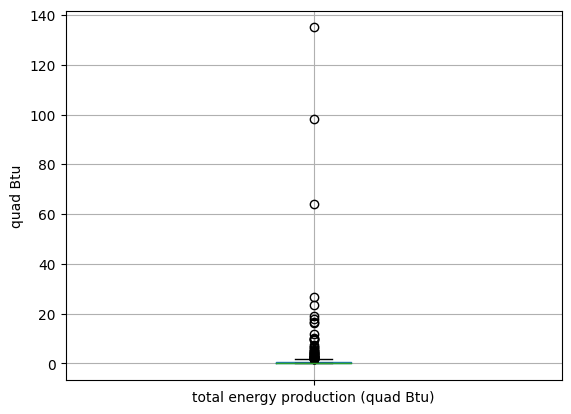

In [21]:
#Distribution of energy production 
total_2021_df1[['total energy production (quad Btu)']].boxplot()
plt.ylabel('quad Btu')


Text(0, 0.5, 'quad Btu')

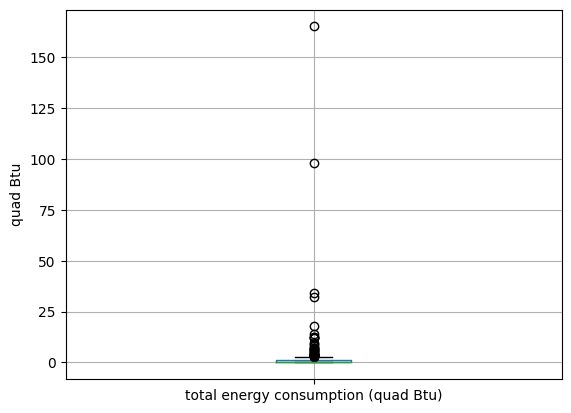

In [22]:
#Distribution of energy consumption
total_2021_df1[['total energy consumption (quad Btu)']].boxplot()
plt.ylabel('quad Btu')


Text(0, 0.5, 'MMtonnes CO2')

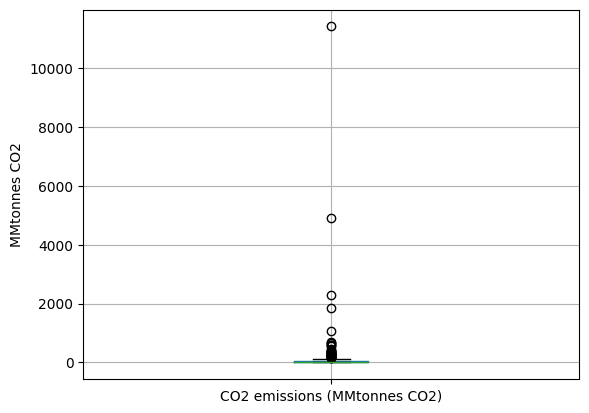

In [23]:
#Distribution of CO2 emissions
total_2021_df1[['CO2 emissions (MMtonnes CO2)']].boxplot()
plt.ylabel('MMtonnes CO2')


<Axes: xlabel='total energy production (quad Btu)', ylabel='total energy consumption (quad Btu)'>

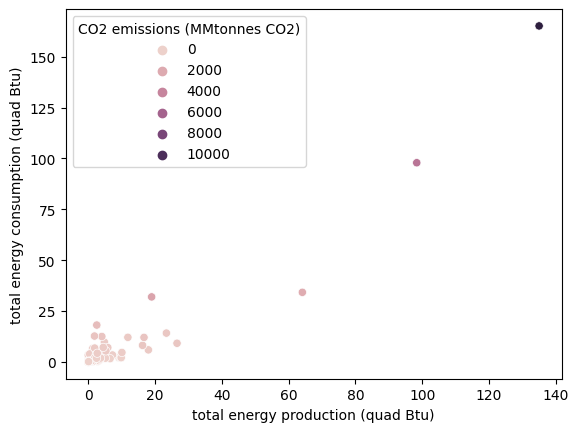

In [24]:
sns.scatterplot(data = total_2021_df1, x='total energy production (quad Btu)', y='total energy consumption (quad Btu)', hue = 'CO2 emissions (MMtonnes CO2)')

<ipython-input-25-9040c117567e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_2021_df1.corr())


<Axes: >

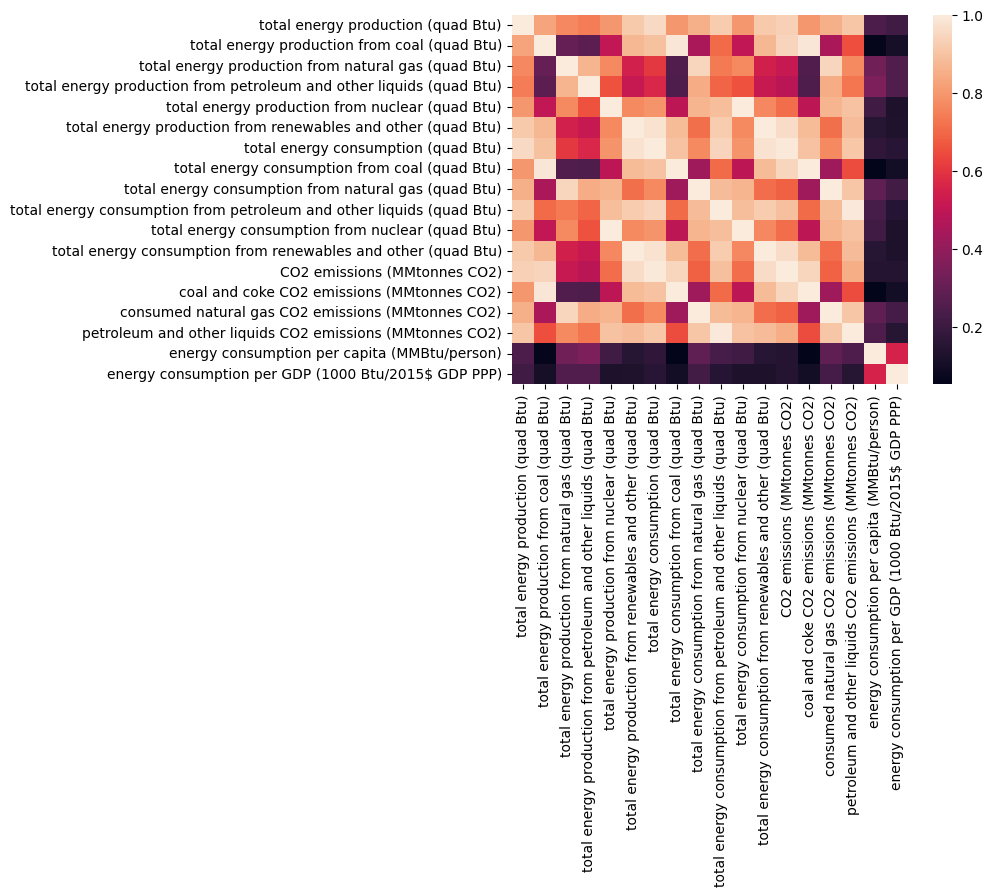

In [25]:
sns.heatmap(total_2021_df1.corr())


In [26]:
#K-Means clustering

In [27]:
#Make new data frame
totaldf = total_2021_df1.drop(['Country ', 'CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)',
        'total energy consumption (quad Btu)'], axis ='columns')

In [28]:
inertia_by_k = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(totaldf)
    # Inertia aka SSE: sum of distances of samples to their closest cluster center
    inertia_by_k[k] = kmeans.inertia_
sorted_inertia_by_k = list(sorted(list(inertia_by_k.items()), key=lambda item: item[1]))
sorted_inertia_by_k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[(9, 1170521.9206334176),
 (8, 1450043.4218977836),
 (7, 1831908.5539191132),
 (6, 2658770.6728263116),
 (5, 3630618.4079770916),
 (4, 5653617.886581376),
 (3, 8499616.80366222),
 (2, 17147524.246685598),
 (1, 102143830.01666439)]

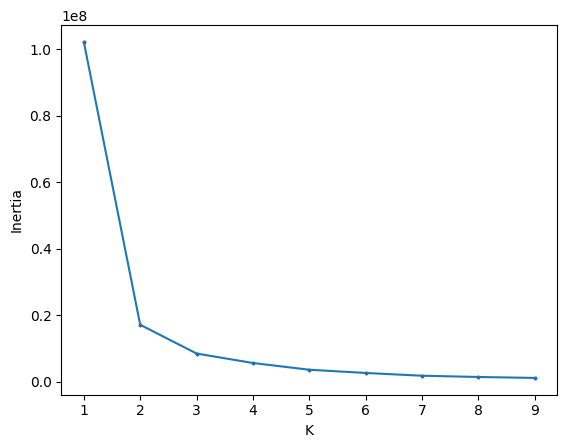

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.xlabel("K")
plt.ylabel("Inertia")
plt.plot(list(inertia_by_k.keys()),
         list(inertia_by_k.values()),
         linestyle = '-',
         marker = 'H',
         markersize = 2,
         markerfacecolor = 'red')

In [30]:
good_k = 2
good_kmeans = KMeans(n_clusters=good_k, random_state=0)
label = good_kmeans.fit(totaldf)
labeled_df = total_2021_df1.copy()
labeled_df["label"] = good_kmeans.labels_
labeled_df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
0,Afghanistan,0.041213,0.031959,0.003140,0.000000,0.0,0.006114,0.092589,0.017505,0.003140,0.047513,0.0,0.024430,5.193676,1.633251,0.166604,3.393821,2.324285,1.379670,0
1,Albania,0.119993,0.002246,0.002080,0.037035,0.0,0.078632,0.137348,0.007010,0.002066,0.051510,0.0,0.076762,4.149237,0.668733,0.109606,3.370897,48.112668,3.427581,0
2,Algeria,6.656882,0.000000,3.830586,2.818340,0.0,0.007956,2.581123,0.000941,1.767237,0.795902,0.0,0.017043,150.929962,1.162455,93.763697,56.003810,58.425575,5.151894,0
3,American Samoa,0.000044,0.000000,0.000000,0.000000,0.0,0.000044,0.005446,0.000000,0.000000,0.005403,0.0,0.000044,0.390971,0.000000,0.000000,0.390971,0.000000,0.000000,0
4,Angola,2.824018,0.000000,0.216598,2.504617,0.0,0.102802,0.328628,0.000000,0.033855,0.191971,0.0,0.102802,17.859114,0.000000,1.796233,16.062881,9.524421,1.770675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Wake Island,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019436,0.0,0.000000,1.220662,0.000000,0.000000,1.220662,0.000000,0.000000,0
214,Western Sahara,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003740,0.000000,0.000000,0.003740,0.0,0.000000,0.265011,0.000000,0.000000,0.265011,0.000000,0.000000,0
215,Yemen,0.128638,0.000000,0.004580,0.118813,0.0,0.005244,0.121546,0.000000,0.004589,0.111712,0.0,0.005244,8.339233,0.000000,0.243473,8.095760,3.685247,2.339224,0
216,Zambia,0.170076,0.027085,0.000000,0.000000,0.0,0.142991,0.227167,0.027006,0.000000,0.061259,0.0,0.138902,6.793368,2.521322,0.000000,4.272046,11.665652,3.623716,0


In [31]:
labeled_df['label'].value_counts()

0    217
1      1
Name: label, dtype: int64

In [32]:
label_0 = labeled_df.loc[labeled_df['label'] == 0]
label_1 = labeled_df.loc[labeled_df['label'] == 1]

In [33]:
label_0

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
0,Afghanistan,0.041213,0.031959,0.003140,0.000000,0.0,0.006114,0.092589,0.017505,0.003140,0.047513,0.0,0.024430,5.193676,1.633251,0.166604,3.393821,2.324285,1.379670,0
1,Albania,0.119993,0.002246,0.002080,0.037035,0.0,0.078632,0.137348,0.007010,0.002066,0.051510,0.0,0.076762,4.149237,0.668733,0.109606,3.370897,48.112668,3.427581,0
2,Algeria,6.656882,0.000000,3.830586,2.818340,0.0,0.007956,2.581123,0.000941,1.767237,0.795902,0.0,0.017043,150.929962,1.162455,93.763697,56.003810,58.425575,5.151894,0
3,American Samoa,0.000044,0.000000,0.000000,0.000000,0.0,0.000044,0.005446,0.000000,0.000000,0.005403,0.0,0.000044,0.390971,0.000000,0.000000,0.390971,0.000000,0.000000,0
4,Angola,2.824018,0.000000,0.216598,2.504617,0.0,0.102802,0.328628,0.000000,0.033855,0.191971,0.0,0.102802,17.859114,0.000000,1.796233,16.062881,9.524421,1.770675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Wake Island,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019436,0.0,0.000000,1.220662,0.000000,0.000000,1.220662,0.000000,0.000000,0
214,Western Sahara,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003740,0.000000,0.000000,0.003740,0.0,0.000000,0.265011,0.000000,0.000000,0.265011,0.000000,0.000000,0
215,Yemen,0.128638,0.000000,0.004580,0.118813,0.0,0.005244,0.121546,0.000000,0.004589,0.111712,0.0,0.005244,8.339233,0.000000,0.243473,8.095760,3.685247,2.339224,0
216,Zambia,0.170076,0.027085,0.000000,0.000000,0.0,0.142991,0.227167,0.027006,0.000000,0.061259,0.0,0.138902,6.793368,2.521322,0.000000,4.272046,11.665652,3.623716,0


In [34]:
label_1

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
40,China,134.964189,93.963903,7.520776,8.56429,4.182124,20.733095,165.158414,96.197752,13.390259,30.852841,4.182124,20.535439,11420.23421,9114.390393,710.442499,1595.40132,115.733741,6.462464,1


In [35]:
#New K-Means

In [36]:
#Make new data frame
totaldf1 = total_2021_df1.drop(['Country ',
       'total energy production from coal (quad Btu)',
       'total energy production from natural gas (quad Btu)',
       'total energy production from petroleum and other liquids (quad Btu)',
       'total energy production from nuclear (quad Btu)',
       'total energy production from renewables and other (quad Btu)',
       'total energy consumption from coal (quad Btu)',
       'total energy consumption from natural gas (quad Btu)',
       'total energy consumption from petroleum and other liquids (quad Btu)',
       'total energy consumption from nuclear (quad Btu)',
       'total energy consumption from renewables and other (quad Btu)',
       'coal and coke CO2 emissions (MMtonnes CO2)',
       'consumed natural gas CO2 emissions (MMtonnes CO2)',
       'petroleum and other liquids CO2 emissions (MMtonnes CO2)',
       'energy consumption per capita (MMBtu/person)',
       'energy consumption per GDP (1000 Btu/2015$ GDP PPP)'], axis ='columns')

In [37]:
inertia_by_k = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(totaldf1)
    # Inertia aka SSE: sum of distances of samples to their closest cluster center
    inertia_by_k[k] = kmeans.inertia_
sorted_inertia_by_k = list(sorted(list(inertia_by_k.items()), key=lambda item: item[1]))
sorted_inertia_by_k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[(9, 161227.60523873998),
 (8, 246724.0885159873),
 (7, 396247.17548547),
 (6, 556516.7691464312),
 (5, 1333121.8878609904),
 (4, 4498574.995735463),
 (3, 10151216.12090076),
 (2, 33988336.0315001),
 (1, 163240180.08249342)]

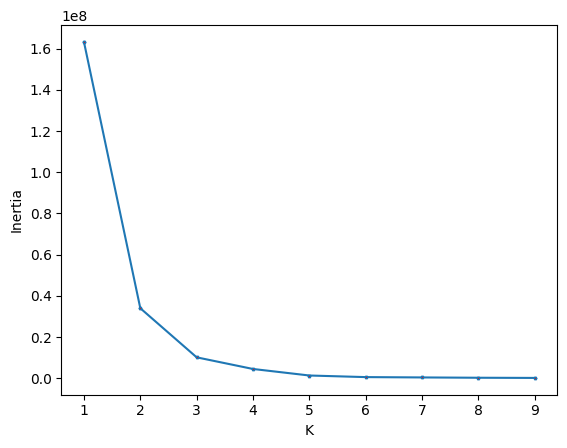

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.xlabel("K")
plt.ylabel("Inertia")
plt.plot(list(inertia_by_k.keys()),
         list(inertia_by_k.values()),
         linestyle = '-',
         marker = 'H',
         markersize = 2,
         markerfacecolor = 'red')

In [39]:
good_k = 3
good_kmeans = KMeans(n_clusters=good_k, random_state=0)
label1 = good_kmeans.fit(totaldf1)
labeled_df1 = total_2021_df1.copy()
labeled_df1["label"] = good_kmeans.labels_
labeled_df1

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
0,Afghanistan,0.041213,0.031959,0.003140,0.000000,0.0,0.006114,0.092589,0.017505,0.003140,0.047513,0.0,0.024430,5.193676,1.633251,0.166604,3.393821,2.324285,1.379670,0
1,Albania,0.119993,0.002246,0.002080,0.037035,0.0,0.078632,0.137348,0.007010,0.002066,0.051510,0.0,0.076762,4.149237,0.668733,0.109606,3.370897,48.112668,3.427581,0
2,Algeria,6.656882,0.000000,3.830586,2.818340,0.0,0.007956,2.581123,0.000941,1.767237,0.795902,0.0,0.017043,150.929962,1.162455,93.763697,56.003810,58.425575,5.151894,0
3,American Samoa,0.000044,0.000000,0.000000,0.000000,0.0,0.000044,0.005446,0.000000,0.000000,0.005403,0.0,0.000044,0.390971,0.000000,0.000000,0.390971,0.000000,0.000000,0
4,Angola,2.824018,0.000000,0.216598,2.504617,0.0,0.102802,0.328628,0.000000,0.033855,0.191971,0.0,0.102802,17.859114,0.000000,1.796233,16.062881,9.524421,1.770675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Wake Island,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019436,0.0,0.000000,1.220662,0.000000,0.000000,1.220662,0.000000,0.000000,0
214,Western Sahara,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003740,0.000000,0.000000,0.003740,0.0,0.000000,0.265011,0.000000,0.000000,0.265011,0.000000,0.000000,0
215,Yemen,0.128638,0.000000,0.004580,0.118813,0.0,0.005244,0.121546,0.000000,0.004589,0.111712,0.0,0.005244,8.339233,0.000000,0.243473,8.095760,3.685247,2.339224,0
216,Zambia,0.170076,0.027085,0.000000,0.000000,0.0,0.142991,0.227167,0.027006,0.000000,0.061259,0.0,0.138902,6.793368,2.521322,0.000000,4.272046,11.665652,3.623716,0


In [40]:
labeled_df1['label'].value_counts()

0    214
2      3
1      1
Name: label, dtype: int64

In [41]:
#Make seperate data frames with labels
label_0 = labeled_df1.loc[labeled_df1['label'] == 0]
label_1 = labeled_df1.loc[labeled_df1['label'] == 1]
label_2 = labeled_df1.loc[labeled_df1['label'] == 2]

In [42]:
label_0

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
0,Afghanistan,0.041213,0.031959,0.003140,0.000000,0.0,0.006114,0.092589,0.017505,0.003140,0.047513,0.0,0.024430,5.193676,1.633251,0.166604,3.393821,2.324285,1.379670,0
1,Albania,0.119993,0.002246,0.002080,0.037035,0.0,0.078632,0.137348,0.007010,0.002066,0.051510,0.0,0.076762,4.149237,0.668733,0.109606,3.370897,48.112668,3.427581,0
2,Algeria,6.656882,0.000000,3.830586,2.818340,0.0,0.007956,2.581123,0.000941,1.767237,0.795902,0.0,0.017043,150.929962,1.162455,93.763697,56.003810,58.425575,5.151894,0
3,American Samoa,0.000044,0.000000,0.000000,0.000000,0.0,0.000044,0.005446,0.000000,0.000000,0.005403,0.0,0.000044,0.390971,0.000000,0.000000,0.390971,0.000000,0.000000,0
4,Angola,2.824018,0.000000,0.216598,2.504617,0.0,0.102802,0.328628,0.000000,0.033855,0.191971,0.0,0.102802,17.859114,0.000000,1.796233,16.062881,9.524421,1.770675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Wake Island,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019436,0.0,0.000000,1.220662,0.000000,0.000000,1.220662,0.000000,0.000000,0
214,Western Sahara,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003740,0.000000,0.000000,0.003740,0.0,0.000000,0.265011,0.000000,0.000000,0.265011,0.000000,0.000000,0
215,Yemen,0.128638,0.000000,0.004580,0.118813,0.0,0.005244,0.121546,0.000000,0.004589,0.111712,0.0,0.005244,8.339233,0.000000,0.243473,8.095760,3.685247,2.339224,0
216,Zambia,0.170076,0.027085,0.000000,0.000000,0.0,0.142991,0.227167,0.027006,0.000000,0.061259,0.0,0.138902,6.793368,2.521322,0.000000,4.272046,11.665652,3.623716,0


In [43]:
label_1

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
40,China,134.964189,93.963903,7.520776,8.56429,4.182124,20.733095,165.158414,96.197752,13.390259,30.852841,4.182124,20.535439,11420.23421,9114.390393,710.442499,1595.40132,115.733741,6.462464,1


In [44]:
label_2

,Country,total energy production (quad Btu),total energy production from coal (quad Btu),total energy production from natural gas (quad Btu),total energy production from petroleum and other liquids (quad Btu),total energy production from nuclear (quad Btu),total energy production from renewables and other (quad Btu),total energy consumption (quad Btu),total energy consumption from coal (quad Btu),total energy consumption from natural gas (quad Btu),total energy consumption from petroleum and other liquids (quad Btu),total energy consumption from nuclear (quad Btu),total energy consumption from renewables and other (quad Btu),CO2 emissions (MMtonnes CO2),coal and coke CO2 emissions (MMtonnes CO2),consumed natural gas CO2 emissions (MMtonnes CO2),petroleum and other liquids CO2 emissions (MMtonnes CO2),energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),label
89,India,18.987533,12.819014,1.193945,1.466086,0.520575,2.987913,31.962516,16.431881,2.468292,9.528996,0.520575,3.012773,2278.237077,1583.866078,130.959365,563.411634,22.661251,3.407843,2
157,Russia,64.103307,10.493205,26.612957,22.667890,2.356200,1.973056,34.210340,4.792909,18.068287,7.157093,2.356200,1.835852,1867.198781,447.239497,958.643064,461.316220,235.426641,8.884609,2
207,United States,98.337251,11.608291,35.794956,30.470762,8.128571,12.334671,97.906955,10.547550,31.731070,36.641232,8.128571,12.171605,4904.410261,1002.327267,1657.323459,2244.759535,295.056793,4.769056,2


In [45]:
#PCA
scaler = StandardScaler()
pca = PCA(2)


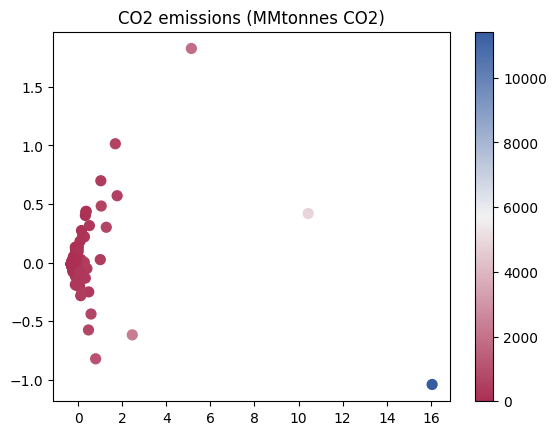

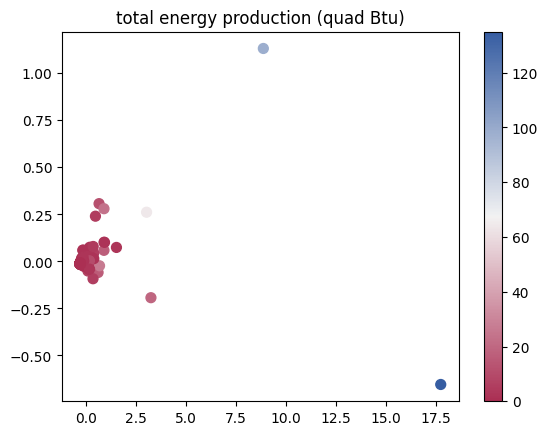

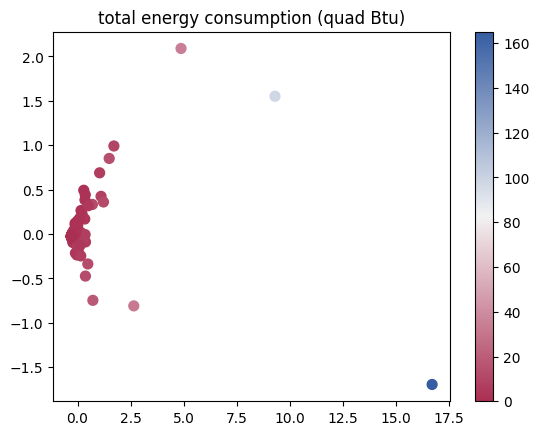

In [46]:
features_to_eval = ['CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)', 'total energy consumption (quad Btu)']
for label in features_to_eval:
    labels = totaldf1[label]
    prep_df = totaldf1.drop(columns=features_to_eval)
    prep_df = totaldf1.drop(columns=[label])
    scaled_df = scaler.fit_transform(prep_df)
    pca_df = pca.fit_transform(scaled_df)

    cmap = sns.diverging_palette(0,255, l=40, as_cmap=True)
    f, ax = plt.subplots()
    points = ax.scatter(pca_df[:,0], pca_df[:,1], c=labels, s=50, cmap=cmap)
    f.colorbar(points)
    plt.title(label)
    plt.show()

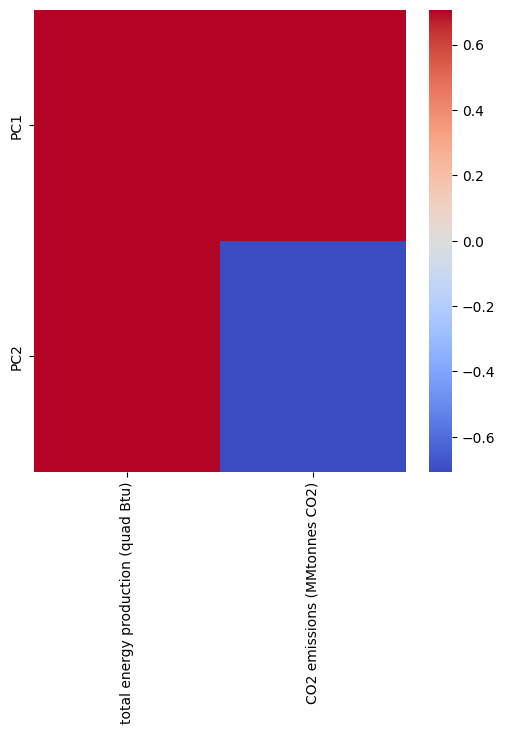

In [47]:
plt.figure(figsize=(6,6))
sns.heatmap(pca.components_,cmap='coolwarm',xticklabels=prep_df.columns,yticklabels=['PC1','PC2'])
plt.show()

In [48]:
#Linear Regression

In [49]:
X = total_2021_df1.drop(['Country ', 'CO2 emissions (MMtonnes CO2)', 'coal and coke CO2 emissions (MMtonnes CO2)',
       'consumed natural gas CO2 emissions (MMtonnes CO2)',
       'petroleum and other liquids CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)',
        'total energy consumption (quad Btu)'], axis ='columns')
y = total_2021_df1['CO2 emissions (MMtonnes CO2)']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [51]:
regr = LinearRegression()

In [52]:
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9971059653892329
The rmse is:  33.268626421425765


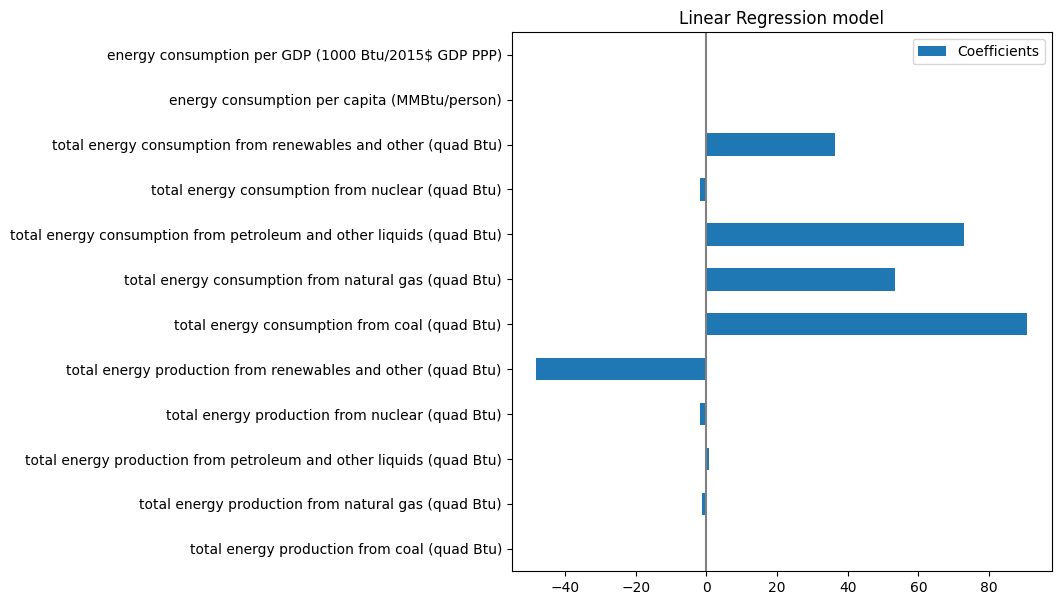

In [53]:
coefs = pd.DataFrame(
   regr.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [54]:
#CatBoost regression

In [55]:
X = total_2021_df1.drop(['Country ', 'CO2 emissions (MMtonnes CO2)', 'coal and coke CO2 emissions (MMtonnes CO2)',
       'consumed natural gas CO2 emissions (MMtonnes CO2)',
       'petroleum and other liquids CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)',
        'total energy consumption (quad Btu)'], axis ='columns')
y = total_2021_df1['CO2 emissions (MMtonnes CO2)']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [58]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [59]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
156:	learn: 109.9837490	test: 93.2911491	best: 93.2911491 (156)	total: 681ms	remaining: 186ms
157:	learn: 108.4384120	test: 93.4752018	best: 93.2911491 (156)	total: 684ms	remaining: 182ms
158:	learn: 106.9619939	test: 93.0912915	best: 93.0912915 (158)	total: 691ms	remaining: 178ms
159:	learn: 105.5626494	test: 93.0348933	best: 93.0348933 (159)	total: 697ms	remaining: 174ms
160:	learn: 104.1912766	test: 92.9891717	best: 92.9891717 (160)	total: 699ms	remaining: 169ms
161:	learn: 102.6970588	test: 92.7180980	best: 92.7180980 (161)	total: 700ms	remaining: 164ms
162:	learn: 101.2080732	test: 92.6784310	best: 92.6784310 (162)	total: 709ms	remaining: 161ms
163:	learn: 99.7751374	test: 92.3951127	best: 92.3951127 (163)	total: 711ms	remaining: 156ms
164:	learn: 98.3678719	test: 92.2137511	best: 92.2137511 (164)	total: 717ms	remaining: 152ms
165:	learn: 96.9420827	test: 92.0622099	best: 92.0622099 (165)	total: 719ms	remaining: 147ms
166:	learn: 

{'params': {'depth': 2,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [60]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 540.33
R2: 0.24


Text(0.5, 0, 'CatBoost Feature Importance')

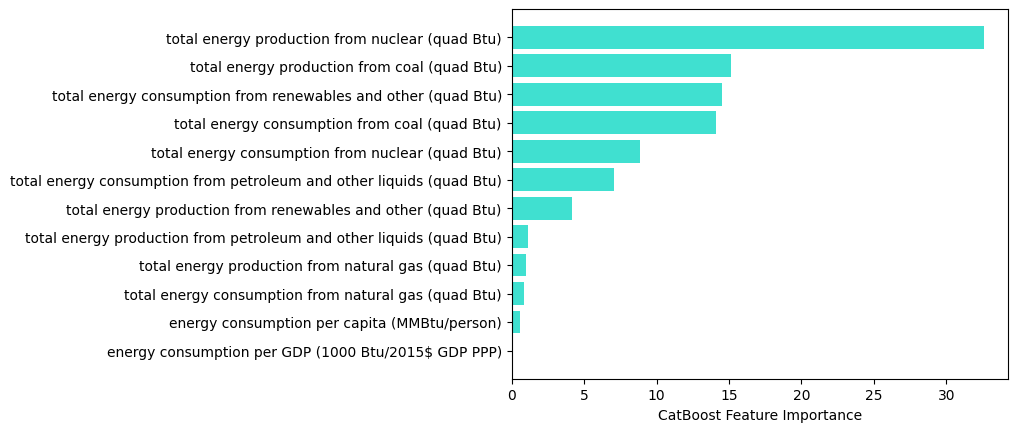

In [61]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [62]:
#Random forest regression

In [63]:
X = total_2021_df1.drop(['Country ', 'CO2 emissions (MMtonnes CO2)', 'coal and coke CO2 emissions (MMtonnes CO2)',
       'consumed natural gas CO2 emissions (MMtonnes CO2)',
       'petroleum and other liquids CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)',
        'total energy consumption (quad Btu)'], axis ='columns')
y = total_2021_df1['CO2 emissions (MMtonnes CO2)']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [66]:
y_pred = rf_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8963375220991072
The rmse is:  199.11033491017716


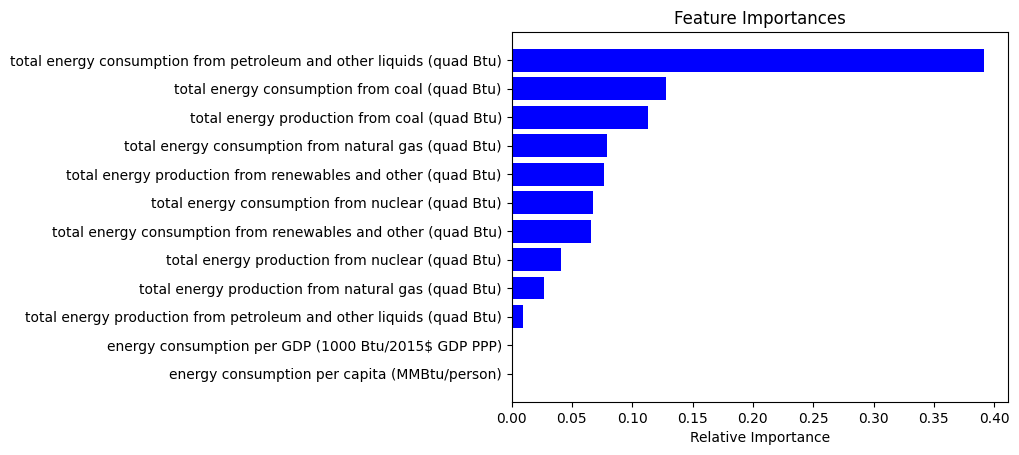

In [67]:
features = X.columns
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
#Cross validation
param_grid = {
    'bootstrap' : [True],
    'max_depth': [5,10,15],
    'max_features': ["sqrt", "log2"],
    'n_estimators': [25, 50, 75, 100, 125, 150]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose =2, scoring='r2',  n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100, 125, 150]},
             scoring='r2', verbose=2)

In [69]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 125}

In [70]:
rf_regressor_cv = RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = 'sqrt',  n_estimators= 75, random_state = 0)

In [71]:
rf_regressor_cv.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=75,
                      random_state=0)

In [72]:
y_pred = rf_regressor_cv.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9364547654964921
The rmse is:  155.89224211639112


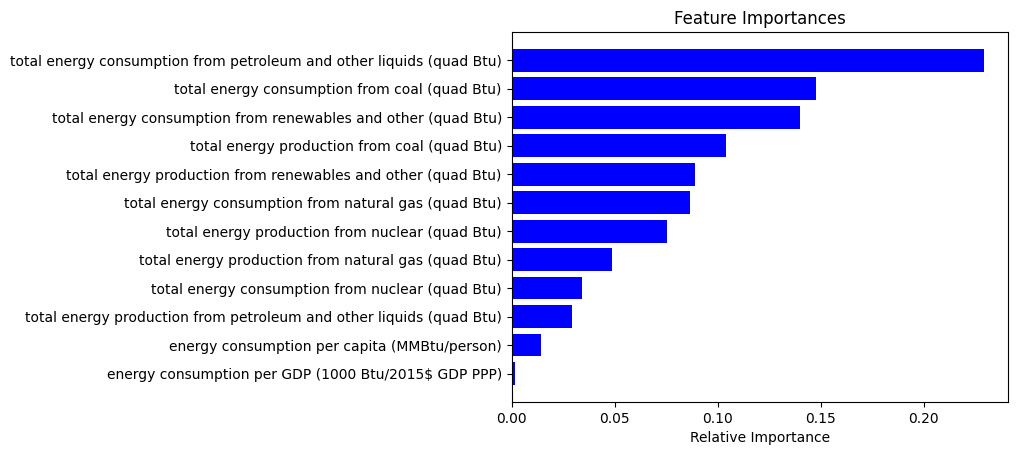

In [73]:
features = X.columns
importances = rf_regressor_cv.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [74]:
#Decision Tree

In [75]:
X = total_2021_df1.drop(['Country ', 'CO2 emissions (MMtonnes CO2)', 'coal and coke CO2 emissions (MMtonnes CO2)',
       'consumed natural gas CO2 emissions (MMtonnes CO2)',
       'petroleum and other liquids CO2 emissions (MMtonnes CO2)', 'total energy production (quad Btu)',
        'total energy consumption (quad Btu)'], axis ='columns')
y = total_2021_df1['CO2 emissions (MMtonnes CO2)']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [77]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [78]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.7163062831123803
The rmse is:  810.1779257426149


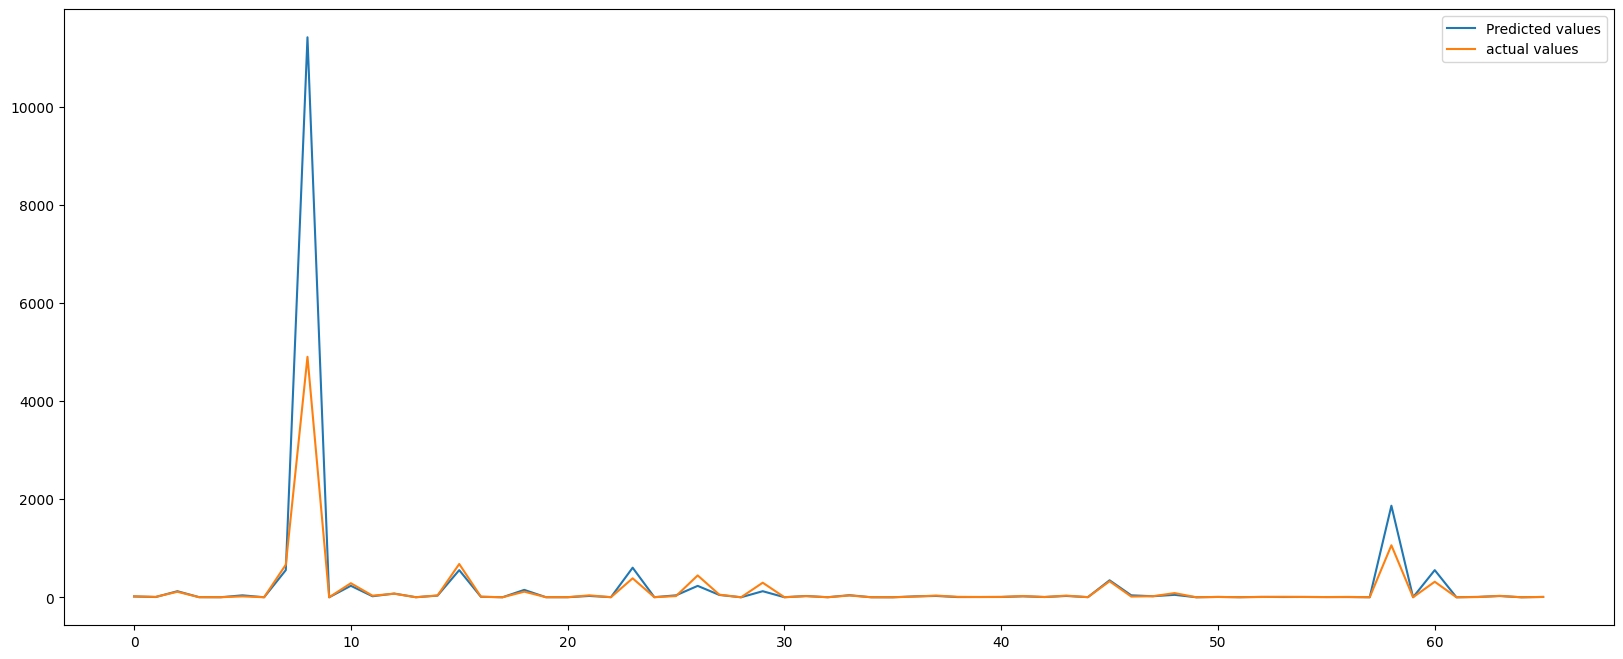

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

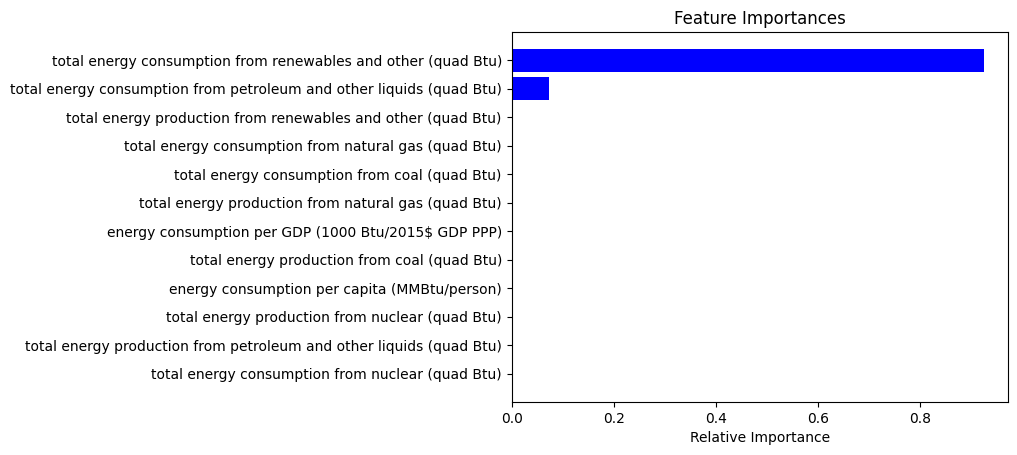

In [80]:
features = X.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

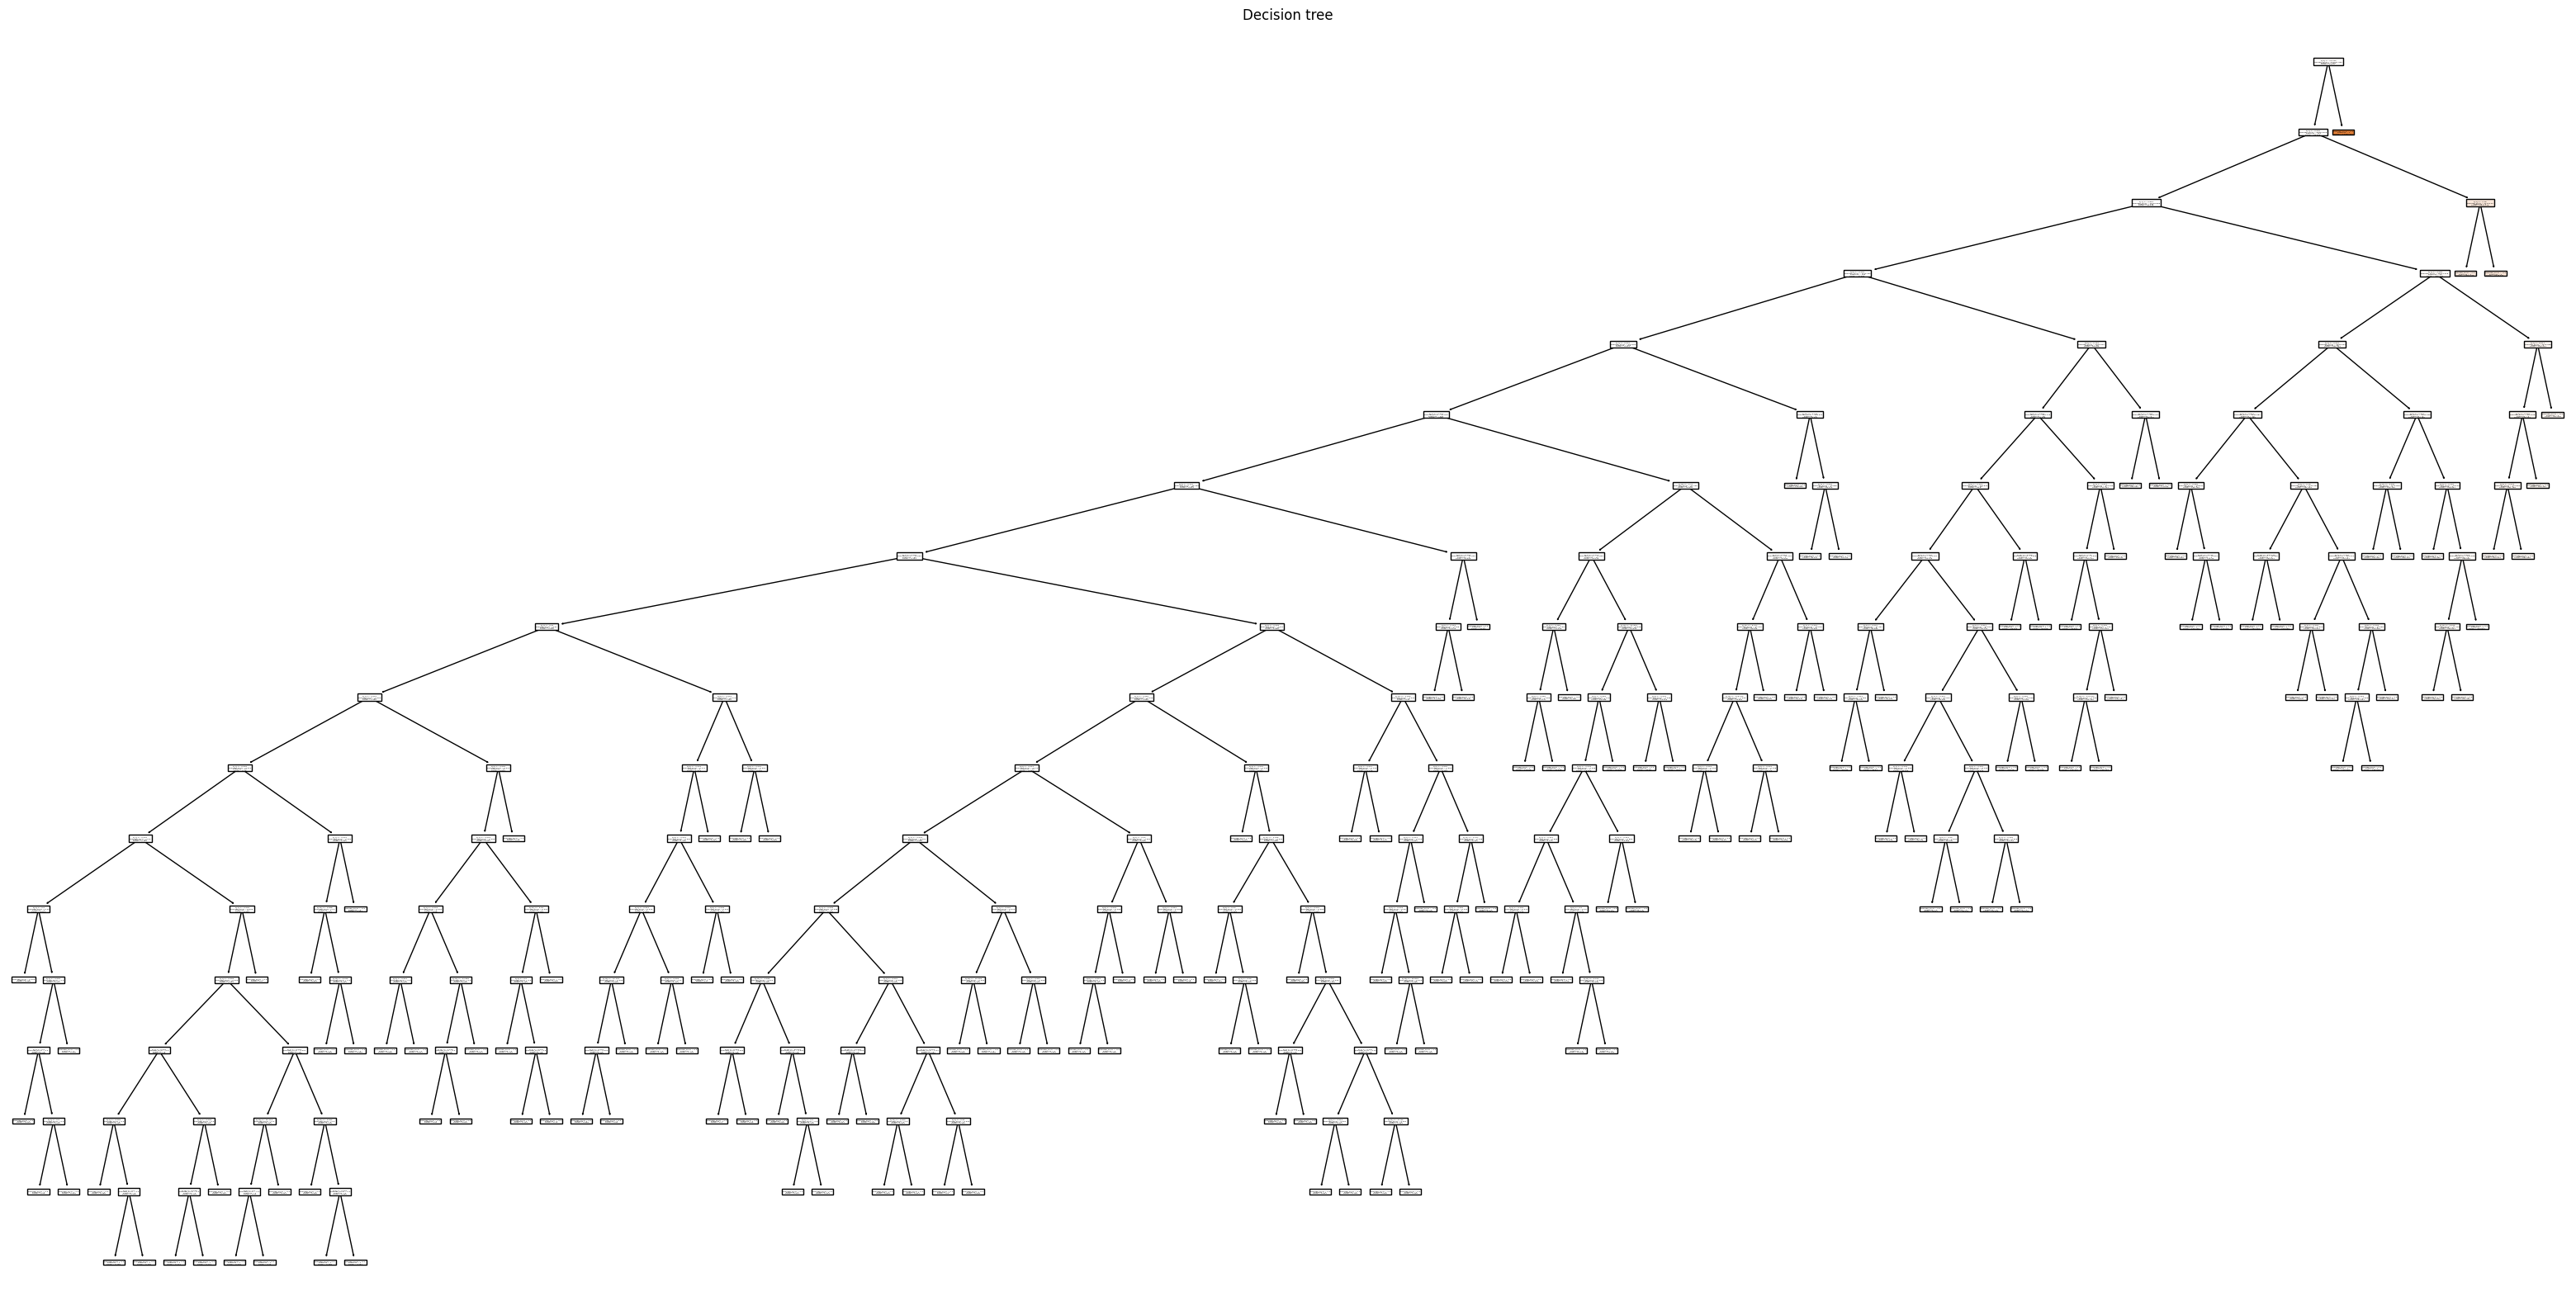

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(regressor, filled=True)
plt.title("Decision tree")
plt.show()

In [82]:
#Cross validation
param_grid = {
    'max_depth': [5,10,15],
    'max_features': ["sqrt", "log2"],
}

regressor = DecisionTreeRegressor(random_state = 0) 
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 5, verbose =2, scoring='r2',  n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2']},
             scoring='r2', verbose=2)

In [83]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 'sqrt'}

In [84]:
regressor_cv = DecisionTreeRegressor(max_depth = 15, max_features = 'sqrt', random_state = 0)

In [85]:
regressor_cv.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, max_features='sqrt', random_state=0)

In [86]:
y_pred = regressor_cv.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.7714395964751677
The rmse is:  823.0878369373535


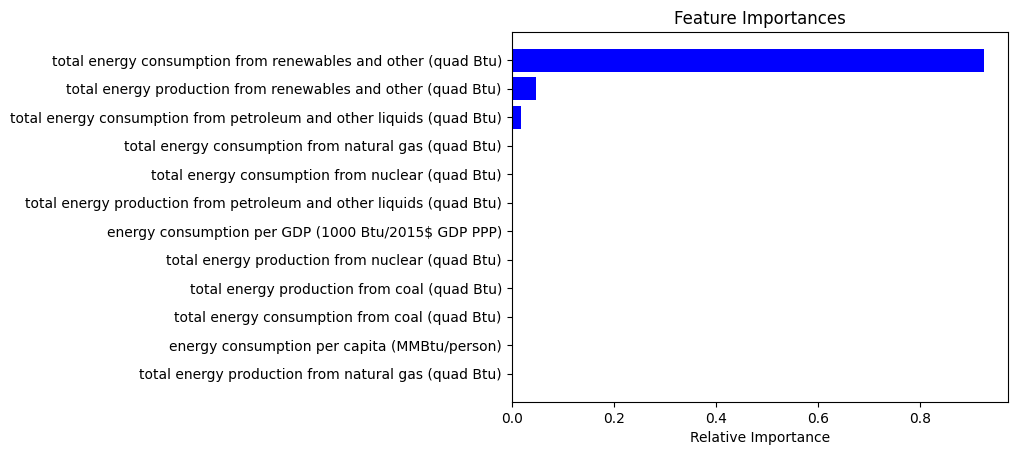

In [87]:
features = X.columns
importances = regressor_cv.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

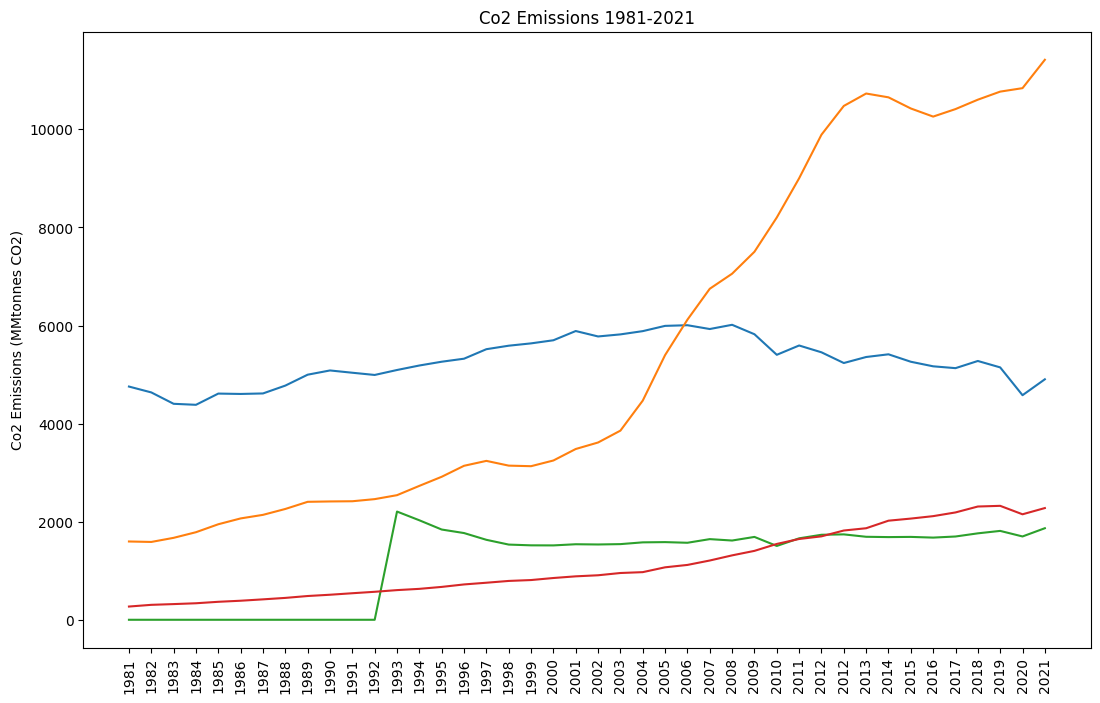

In [88]:
#Emissions by country plot
plt.figure(figsize=(13, 8))

plt.ylabel("Co2 Emissions (MMtonnes CO2)")
plt.title("Co2 Emissions 1981-2021")
plt.xticks(np.arange(42), [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,1991, 1992, 1993, 1994, 1995, 1996
                           , 1997, 1998, 1999, 2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2012
                           , 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.xticks(rotation = 90)
plt.plot(emissions_df['United States'])
plt.plot(emissions_df['China'])
plt.plot(emissions_df['Russia'])
plt.plot(emissions_df['India'])